In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Convert CSV to Pandas

In [57]:
labeled_data = pd.read_csv('./labeled_data.csv')
taxonomy_data = pd.read_csv('./taxonomy.csv')
labeled_data.fillna('[]', inplace = True)

In [58]:
taxonomy_labels = []

for column in taxonomy_data.columns:
    taxonomy_labels += list(taxonomy_data[column].dropna().values)

In [86]:
analysis_object = {}
label_info = {
    "Absolute Label Frequency": {},
    "Relative Label Frequency": {}
}

# Iterate through each row within our csv
for index, row in labeled_data.iterrows():

    # Look through each label and increment label counter if found
    for i in range(1,4):
        for label in eval(row["label_level_{}".format(i)]):
            if (label in taxonomy_labels):
                label_count = label_info["Absolute Label Frequency"].get(label, 0)
                label_info["Absolute Label Frequency"][label] = label_count + 1


In [87]:
# Save label summaries

label_info["Total Number of Labels"] = sum(label_info["Absolute Label Frequency"].values())

for label in label_info["Absolute Label Frequency"].keys():
    label_info["Relative Label Frequency"][label] = round((label_info["Absolute Label Frequency"][label] / label_info["Total Number of Labels"]), 4) * 100

In [99]:
label_dataframe = pd.DataFrame(label_info).drop("Total Number of Labels", axis = 1)

In [125]:
label_dataframe["Label Length"] = label_dataframe.index.map(lambda label: len(label.split(" ")))

In [126]:
label_dataframe.head()

,Absolute Label Frequency,Relative Label Frequency,Label Length
Physically assemble/disassemble,92,1.80,2
Protect from harm,360,7.04,3
Physically assemble structure,55,1.07,3
Protect from living threats,160,3.13,4
Protect from non-living threats,218,4.26,4


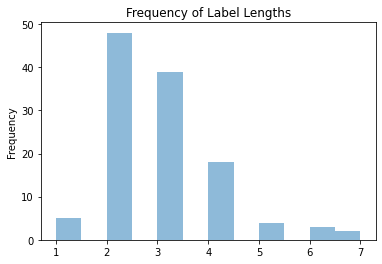

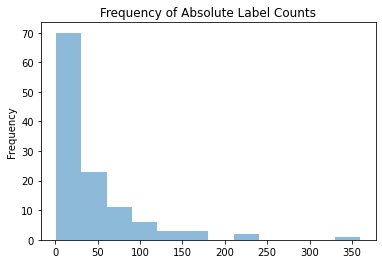

In [127]:
label_dataframe["Label Length"].plot.hist(bins = 12, alpha=0.5, title = "Frequency of Label Lengths")
plt.show()
label_dataframe["Absolute Label Frequency"].plot.hist(bins = 12, alpha=0.5, title = "Frequency of Absolute Label Counts")
plt.show()